<a href="https://colab.research.google.com/github/swastikbanerjee/Projects_ML/blob/main/SpamDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/emails.csv")

In [ ]:
data.shape

(5728, 2)

In [ ]:
data.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [ ]:
data['spam'].sum()

1368

In [ ]:
data.isnull().sum()

text    0
spam    0
dtype: int64

In [ ]:
data.dtypes

text    object
spam     int64
dtype: object

Bar chart to illustrate the distribution of the
email dataset, showing the proportion of emails that are labeled as Spam & Not Spam

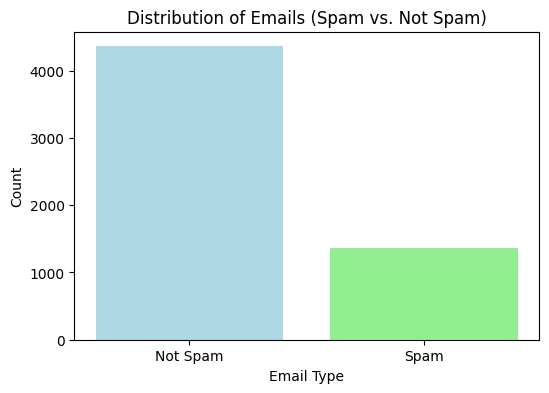

In [ ]:
spam_counts = data['spam'].value_counts()

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar(spam_counts.index, spam_counts.values, color=['lightblue', 'lightgreen'])
plt.xticks(spam_counts.index, ['Not Spam', 'Spam'])
plt.xlabel('Email Type')
plt.ylabel('Count')
plt.title('Distribution of Emails (Spam vs. Not Spam)')
plt.show()

Pie chart to illustrate the distribution of the
email dataset, showing the proportion of emails that are labeled as Spam & Not Spam

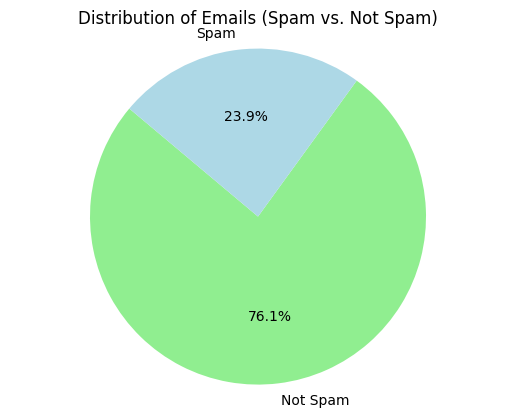

In [ ]:
spam_counts = data['spam'].value_counts()

# Create a pie chart
labels = ['Not Spam', 'Spam']
colors = ['lightgreen', 'lightblue']

plt.pie(spam_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.title('Distribution of Emails (Spam vs. Not Spam)')
plt.show()

 Gaussian Naive Bayes is suitable for continuous data that follows a Gaussian (normal) distribution.

 Multinomial Naive Bayes is appropriate for discrete data, typically used for text classification tasks where features represent word counts or term frequencies.

 Bernoulli Naive Bayes is designed for binary or boolean features, where each feature is a binary variable indicating the presence or absence of a particular attribute.

Training 3 different types of Naive Bayes model on the emails.csv file content

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['spam'], test_size=0.2, random_state=33)

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)
# Term Frequency-Inverse Document Frequency (TF-IDF) is another vectorization technique that takes into account the importance of words in a document relative to their importance in the entire corpus.
# TF-IDF vectors give higher weights to terms that are frequent in a document but rare in the corpus.
# This helps in identifying important words for classification.

# Initialize and train the Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_tfidf.toarray(), y_train)
gnb_predictions = gnb.predict(X_test_tfidf.toarray())

# Initialize and train the Multinomial Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(X_train_tfidf, y_train)
mnb_predictions = mnb.predict(X_test_tfidf)

# Initialize and train the Bernoulli Naive Bayes classifier
bnb = BernoulliNB()
bnb.fit(X_train_tfidf, y_train)
bnb_predictions = bnb.predict(X_test_tfidf)

# Evaluate the classifiers
print("Gaussian Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, gnb_predictions))
print("Classification Report:\n", classification_report(y_test, gnb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, gnb_predictions))

print("\nMultinomial Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, mnb_predictions))
print("Classification Report:\n", classification_report(y_test, mnb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_predictions))

print("\nBernoulli Naive Bayes:")
print("Accuracy:", accuracy_score(y_test, bnb_predictions))
print("Classification Report:\n", classification_report(y_test, bnb_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, bnb_predictions))

Gaussian Naive Bayes:
Accuracy: 0.9668411867364747
Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       881
           1       0.98      0.87      0.92       265

    accuracy                           0.97      1146
   macro avg       0.97      0.93      0.95      1146
weighted avg       0.97      0.97      0.97      1146

Confusion Matrix:
 [[877   4]
 [ 34 231]]

Multinomial Naive Bayes:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]

Bernoulli Naive Bayes:
Accuracy: 0.9572425828970331
Classification Report:
               precision    reca

Class 0 (Negative Class, e.g., "Not Spam"):


TP0 (True Positives for Class 0): The number of instances correctly classified as Class 0 (not spam).

FP0 (False Positives for Class 0): The number of instances incorrectly classified as Class 0 (not spam) when they are actually Class 1 (spam).

FN0 (False Negatives for Class 0): The number of instances incorrectly classified as Class 1 (spam) when they are actually Class 0 (not spam).

TN0 (True Negatives for Class 0): The number of instances correctly classified as Class 1 (spam).

Class 1 (Positive Class, e.g., "Spam"):

TP1 (True Positives for Class 1): The number of instances correctly classified as Class 1 (spam).

FP1 (False Positives for Class 1): The number of instances incorrectly classified as Class 1 (spam) when they are actually Class 0 (not spam).

FN1 (False Negatives for Class 1): The number of instances incorrectly classified as Class 0 (not spam) when they are actually Class 1 (spam).

TN1 (True Negatives for Class 1): The number of instances correctly classified as Class 0 (not spam).

TP0 = TN1, TP1 = TN0, FP0 = FN1, FP1 = FN0

 Support represents the number of samples in each class. In this case, there are 881 "not spam" emails and 265 "spam" emails in the test dataset.

The top-left cell (877) represents true negatives (TN), which are "not spam" emails correctly classified as such.

The top-right cell (4) represents false positives (FP), which are "not spam" emails incorrectly classified as "spam."

The bottom-left cell (34) represents false negatives (FN), which are "spam" emails incorrectly classified as "not spam."

The bottom-right cell (231) represents true positives (TP), which are "spam" emails correctly classified as such.

FP value should ideally be 0 in email spam detection scenario.

With the highest accuracy and least FP value, Multinomial Naive Bayes emerge as the best model.

Applying Laplace Smoothing technique on the Naive Bayes Models

In [ ]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

# Initialize and train the Multinomial Naive Bayes classifier with Laplace smoothing
mnb_with_smoothing = MultinomialNB(alpha=1.0)  # The alpha parameter controls the amount of smoothing (1.0 for Laplace)
mnb_with_smoothing.fit(X_train_tfidf, y_train)
mnb_with_smoothing_predictions = mnb_with_smoothing.predict(X_test_tfidf)

# Initialize and train the Bernoulli Naive Bayes classifier with Laplace smoothing
bnb_with_smoothing = BernoulliNB(alpha=1.0)  # The alpha parameter controls the amount of smoothing (1.0 for Laplace)
bnb_with_smoothing.fit(X_train_tfidf, y_train)
bnb_with_smoothing_predictions = bnb_with_smoothing.predict(X_test_tfidf)

# Evaluate the models with smoothing
print("Multinomial Naive Bayes with Laplace Smoothing:")
print("Accuracy:", accuracy_score(y_test, mnb_with_smoothing_predictions))
print("Classification Report:\n", classification_report(y_test, mnb_with_smoothing_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, mnb_with_smoothing_predictions))

print("\nBernoulli Naive Bayes with Laplace Smoothing:")
print("Accuracy:", accuracy_score(y_test, bnb_with_smoothing_predictions))
print("Classification Report:\n", classification_report(y_test, bnb_with_smoothing_predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, bnb_with_smoothing_predictions))

Multinomial Naive Bayes with Laplace Smoothing:
Accuracy: 0.9842931937172775
Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       881
           1       0.98      0.95      0.97       265

    accuracy                           0.98      1146
   macro avg       0.98      0.97      0.98      1146
weighted avg       0.98      0.98      0.98      1146

Confusion Matrix:
 [[877   4]
 [ 14 251]]

Bernoulli Naive Bayes with Laplace Smoothing:
Accuracy: 0.9572425828970331
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.95      0.97       881
           1       0.85      1.00      0.92       265

    accuracy                           0.96      1146
   macro avg       0.92      0.97      0.94      1146
weighted avg       0.96      0.96      0.96      1146

Confusion Matrix:
 [[833  48]
 [  1 264]]


 Gaussian Naive Bayes (GaussianNB) is specifically designed for continuous data and does not support Laplace smoothing.

After Laplace Smoothing too, with the highest accuracy and least FP value, Multinomial Naive Bayes emerge as the best model as hence only Multinomial Naive Bayes considered from next steps.

Using a heatmap to visualise the confusion matrix having TP,FP,FN,TN values

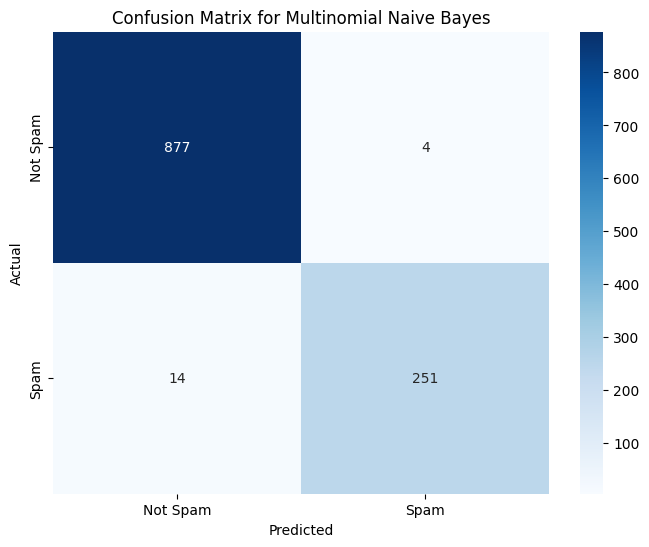

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix for Multinomial Naive Bayes predictions
conf_matrix = confusion_matrix(y_test, mnb_with_smoothing_predictions)

# Define class labels
class_labels = ["Not Spam", "Spam"]

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Multinomial Naive Bayes')
plt.show()

Plotting an ROC curve to visualize the trade-
off between the model's true positive rate (sensitivity) and false positive rate (1-specificity) at
different classification thresholds

Multinomial Naive Bayes - ROC AUC: 1.00
Threshold for Minimizing FPR: 0.2214


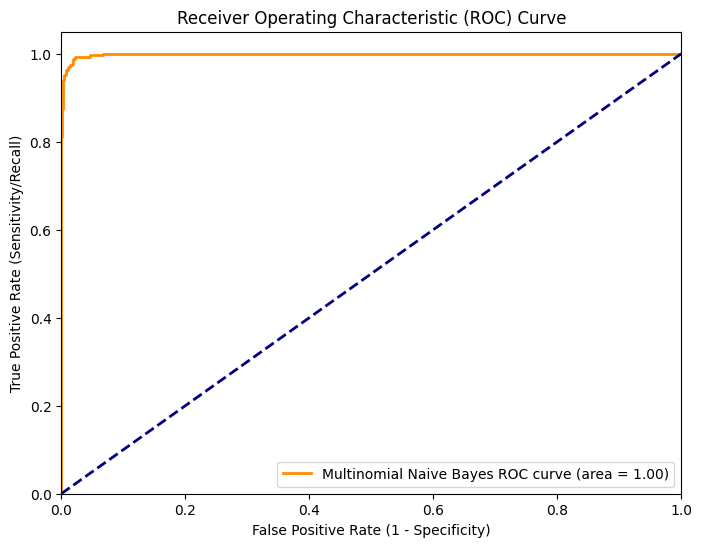

In [ ]:
from sklearn.metrics import roc_curve, auc

# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Compute ROC curve and ROC area (AUC) for Multinomial Naive Bayes
fpr_mnb, tpr_mnb, thresholds_mnb = roc_curve(true_labels, mnb_prob_predictions)
roc_auc_mnb = auc(fpr_mnb, tpr_mnb)

# Calculate the Youden's J statistic for each threshold
youden_j = tpr_mnb - fpr_mnb
optimal_threshold_index = np.argmax(youden_j)
optimal_threshold = thresholds_mnb[optimal_threshold_index]

# Create the ROC curve plot for Multinomial Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_mnb, tpr_mnb, color='darkorange', lw=2, label='Multinomial Naive Bayes ROC curve (area = {:.2f})'.format(roc_auc_mnb))

# Show the ROC curve plot for Multinomial Naive Bayes
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity/Recall)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Print ROC AUC value for Multinomial Naive Bayes
print('Multinomial Naive Bayes - ROC AUC: {:.2f}'.format(roc_auc_mnb))

# Print threshold that maximizes Youden's J statistic for Multinomial Naive Bayes
print('Threshold for Minimizing FPR: {:.4f}'.format(optimal_threshold))

plt.show()

Specificity: Specificity is a measure of how well a model can correctly identify the negative class (e.g., "Not Spam" in your spam detection problem). It is calculated as the ratio of true negatives (TN) to the total number of actual negatives (TN + FP). In other words, specificity measures the ability of the model to avoid classifying non-spam emails as spam.

1 - Specificity: This is simply the complement of specificity, which means it represents the probability of a false positive. It quantifies the rate at which the model incorrectly classifies negative instances as positive.

So, "1 - specificity" in the context of an ROC curve, it is showing the false positive rate


The ROC AUC (Receiver Operating Characteristic Area Under the Curve) value is a numerical measure that quantifies the overall performance of a binary classification model, particularly in terms of its ability to discriminate between the positive and negative classes. It represents the area under the ROC curve.

The ROC AUC value typically ranges from 0 to 1, where 0 indicates poor performance (the model performs no better than random guessing), and 1 indicates perfect performance (the model makes perfect predictions).

Threshold Selection for Minimizing FP: To minimize false positives (FP), we should choose a threshold on the x-axis that corresponds to a lower FPR. This means selecting a threshold where the model is conservative in classifying emails as spam, resulting in fewer false positives.

Threshold Selection for Minimizing FN: To minimize false negatives (FN), we should choose a threshold on the x-axis that corresponds to a higher FPR. This allows the model to be more permissive in classifying emails as spam, leading to higher recall and capturing more spam emails.

Precision-Recall curve to assess the model's precision and
recall at various decision thresholds

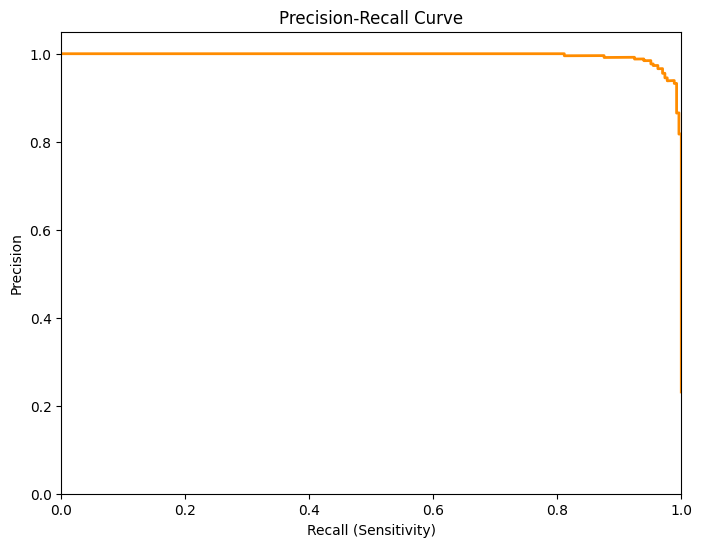

In [ ]:
from sklearn.metrics import precision_recall_curve

# Generate probability predictions using predict_proba
mnb_prob_predictions = mnb_with_smoothing.predict_proba(X_test_tfidf)[:, 1]  # Use [:, 1] for the positive class

true_labels = y_test

# Calculate precision and recall at various thresholds
precision, recall, thresholds = precision_recall_curve(true_labels, mnb_prob_predictions)

# Create the precision-recall curve plot
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2)
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

Precision is important because it tells us how many of the emails classified as spam are actually spam. Higher precision means fewer false positives, which is crucial to avoid legitimate emails being classified as spam (false alarms).  Laplace smoothing can help improve precision by preventing division by zero and reducing the impact of outliers.

Recall is important because it tells us how many of the actual spam emails were correctly identified as spam by the model. Higher recall means that fewer spam emails are missed (false negatives), which is essential to ensure that spam emails don't reach the inbox. Laplace smoothing can impact recall by reducing the impact of extreme values in the confusion matrix.

Horizontal Bar Chart that shows the top 10 important features (words) used by the Naive Bayes model with Laplace smoothing to distinguish between spam
and non-spam emails

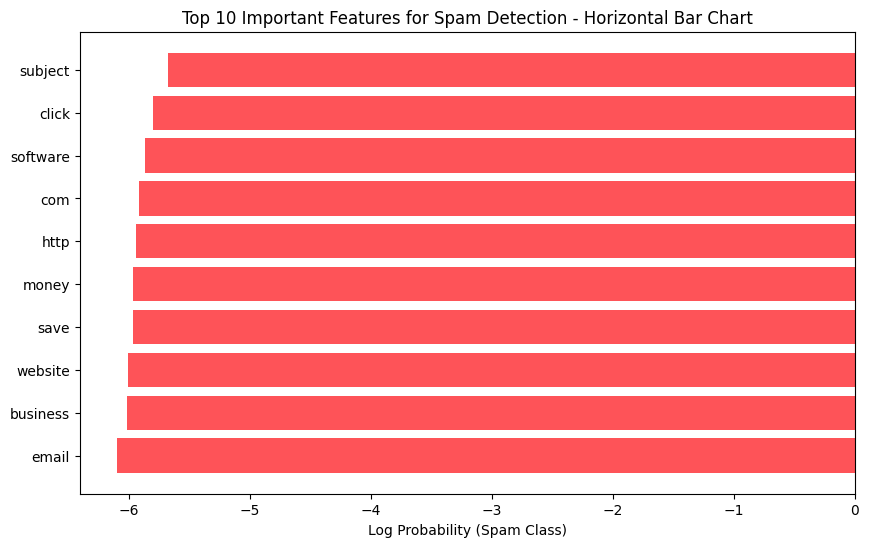

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

mnb_model = mnb_with_smoothing

# Get the log probabilities for the spam class (class 1)
log_probabilities_spam = mnb_model.feature_log_prob_[1]

# Get the feature names from your TF-IDF vectorizer's vocabulary
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())

# Sort the features based on log probabilities in descending order
sorted_indices = np.argsort(log_probabilities_spam)[::-1]  # Descending order indices
sorted_features = feature_names[sorted_indices]

# Select the top N features
top_n = 10  # Replace N with the desired number of top features
top_features = sorted_features[:top_n]
top_log_probabilities = log_probabilities_spam[sorted_indices][:top_n]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_features, top_log_probabilities, color='#FE5358')
plt.xlabel('Log Probability (Spam Class)')
plt.title('Top {} Important Features for Spam Detection - Horizontal Bar Chart'.format(top_n))
plt.gca().invert_yaxis()  # Inverting y-axis to display the most important feature at the top
plt.show()

A negative log probability indicates that the estimated probability of a feature occurring in a particular class is less than 1.0. This is expected because probabilities are typically between 0 and 1. When taking the logarithm of a probability less than 1.0, you get a negative value.

The magnitude of the negative log probability indicates how unlikely the feature is in the given class. Larger negative values suggest that the feature is less likely to appear in the class, and smaller negative values suggest a higher likelihood.

Comprehensive Assessment of the model's performance with Laplace smoothing on the basis of accuracy, precision, recall, F1-score, and auc-roc scores

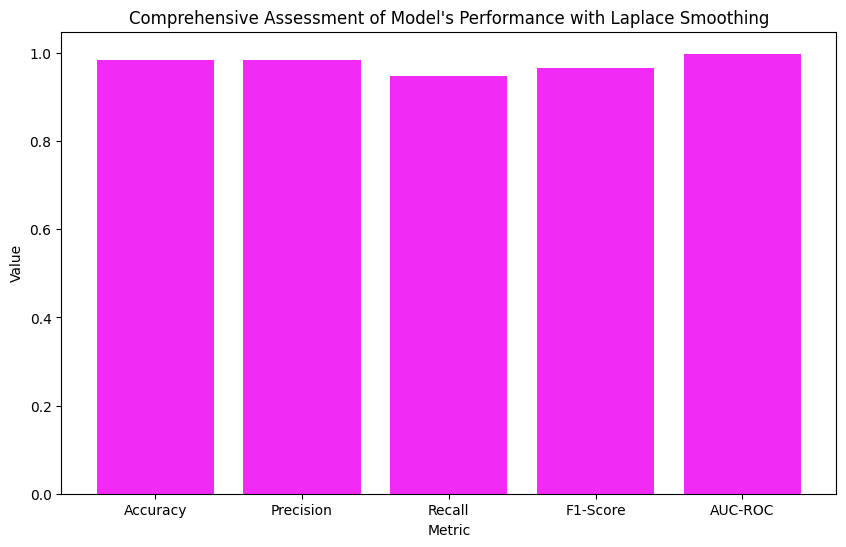

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, mnb_with_smoothing_predictions)
precision = precision_score(y_test, mnb_with_smoothing_predictions)
recall = recall_score(y_test, mnb_with_smoothing_predictions)
f1 = f1_score(y_test, mnb_with_smoothing_predictions)
roc_auc = roc_auc_score(y_test, mnb_prob_predictions)

metrics_dict = {
    "Accuracy": accuracy,
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "AUC-ROC": roc_auc,
}

# Extract metric names and values
metric_names = list(metrics_dict.keys())
metric_values = list(metrics_dict.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metric_names, metric_values, color='#F22AF5')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.title('Comprehensive Assessment of Model\'s Performance with Laplace Smoothing')
plt.show()

Line graph that
demonstrates the trade-offs between precision and recall at different decision thresholds

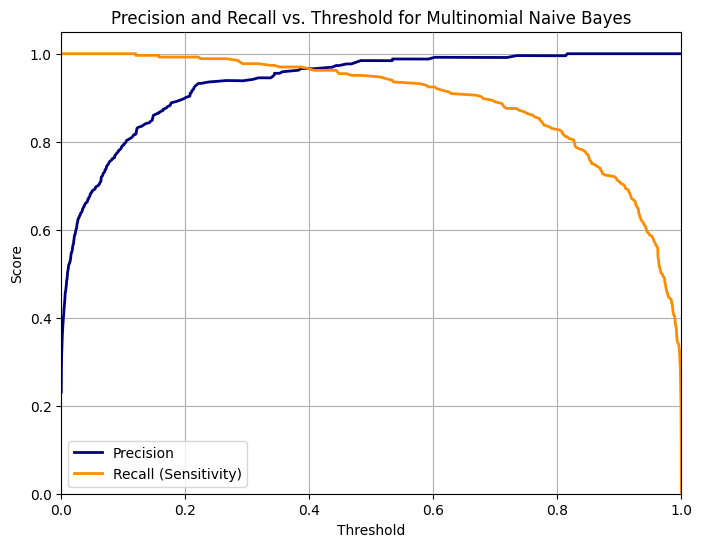

In [ ]:
from sklearn.metrics import precision_recall_curve

fpr_mnb, tpr_mnb, thresholds_mnb

# Calculate precision at various thresholds
precision, recall, thresholds = precision_recall_curve(y_test, mnb_prob_predictions)

# Create a line graph to show precision vs. recall at different thresholds
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='navy', lw=2)
plt.plot(thresholds, recall[:-1], label='Recall (Sensitivity)', color='darkorange', lw=2)
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision and Recall vs. Threshold for Multinomial Naive Bayes')
plt.legend(loc='lower left')
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.grid()
plt.show()

Laplace Smoothing on Multinomial Naive Bayes model with an alpha value of 1.0 gave me the highest accuracy of 98.43%.